# Volume 4: Spectral 2
    <Name>
    <Class>
    <Date>

In [3]:
import numpy as np
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Sample Code

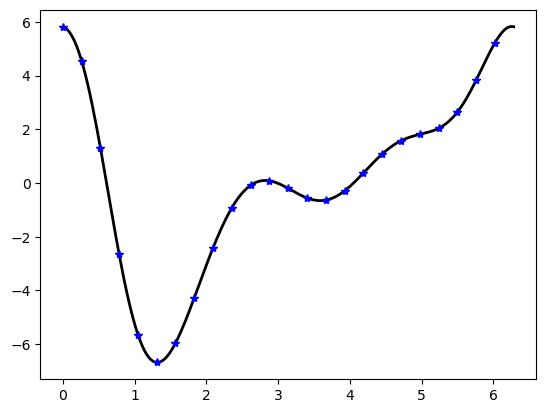

In [4]:
N=24
x1 = (2.*np.pi/N)*np.arange(N)
f = np.sin(x1)**2.*np.cos(x1) + np.exp(2.*np.sin(x1+1))

k = np.concatenate(( np.arange(0,N/2) ,
                    np.array([0]) , # Because hat{f}'(k) at k = N/2 is zero.
                    np.arange(-N/2+1,0) ))

# Approximates the derivative using the pseudospectral method
f_hat = fft(f)
fp_hat = ((1j*k)*f_hat)
fp = np.real(ifft(fp_hat))

# Calculates the derivative analytically
x2 = np.linspace(0,2*np.pi,200)
derivative = (2.*np.sin(x2)*np.cos(x2)**2. -
              np.sin(x2)**3. +
              2*np.cos(x2+1)*np.exp(2*np.sin(x2+1))
             )

plt.plot(x2,derivative,'-k',linewidth=2.)
plt.plot(x1,fp,'*b')
plt.show()

# Problem 1

Create a function
that approximates 1/2u'' − u' on the Fourier grid points for N = 24.

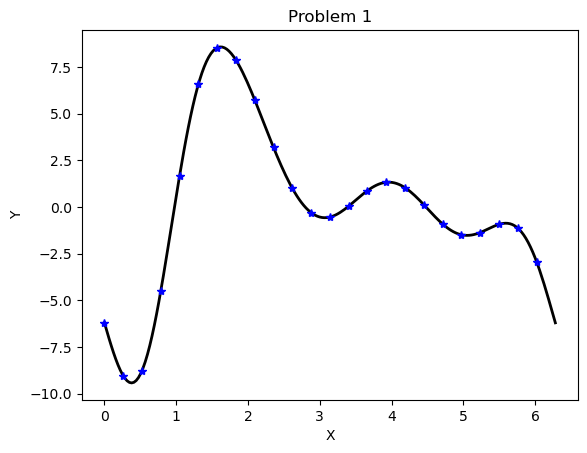

In [5]:
# Do the set up for the Psuedospectral Method
N=24
x1 = (2.*np.pi/N)*np.arange(N)
f = np.sin(x1)**2.*np.cos(x1) + np.exp(2.*np.sin(x1+1))

k = np.concatenate(( np.arange(0,N/2) ,
                    np.array([0]) , # Because hat{f}'(k) at k = N/2 is zero.
                    np.arange(-N/2+1,0) ))

# Approximates the derivative using the pseudospectral method
f_hat = fft(f)
fp_hat = ((1j*k)*f_hat)
fp = np.real(ifft(fp_hat))

# Approximates the double derivative using the spectral method
fp_hat = fft(fp)
fpp_hat = ((1j*k)*fp_hat)
fpp = np.real(ifft(fpp_hat))

# Calculates the double derivative analytically
x2 = np.linspace(0,2*np.pi,200)
derivative = (2.*np.sin(x2)*np.cos(x2)**2. -
              np.sin(x2)**3. +
              2*np.cos(x2+1)*np.exp(2*np.sin(x2+1))
             )
d_derivative = 2 * np.cos(2*x2)*np.cos(x2) - np.sin(x2)*np.sin(2*x2) - 3*np.sin(x2)**2 * np.cos(x2) + 2* (2*np.exp(2*np.sin(x2+1)) * np.cos(x2+1)**2 - np.exp(2*np.sin(x2+1))*np.sin(x2+1))

# Calculate spectral solution and analytical solution
sol = (0.5) * fpp - fp
anal_sol = (0.5) * d_derivative - derivative


plt.plot(x2,anal_sol,'-k',linewidth=2.)
plt.plot(x1,sol,'*b')
plt.title('Problem 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


# Problem 2 
Using a solve_ivp, solve the initial value problem. 
Plot your numerical solution from
t = 0 to t = 8 over 250 time steps and 200 x steps. Note that the initial data is nearly zero
near x = 0 and 2π, and so we can use the pseudospectral method. a Use the following code to
help graph.

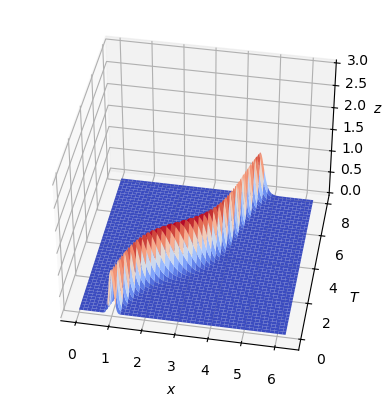

In [24]:
# Define t_steps and x_steps
t_steps = 250
x_steps = 200

# Define the k values
k = np.concatenate(( np.arange(0,x_steps/2) ,
                    np.array([0]) , # Because hat{f}'(k) at k = N/2 is zero.
                    np.arange(-x_steps/2+1,0) ))

# Define x values and t values
x_domain = (2*np.pi/x_steps)*np.arange(x_steps)
t_domain = (8/t_steps)*np.arange(t_steps)

# Define c function
c = lambda x: 0.2 + np.sin(x-1)**2

# Element 1: The ODE function
def ivp_2(t,u):
    du_dt = -c(x_domain) * ifft(1j * k * fft(u)) 
    return du_dt
    
    

# Element 2: The Initial Condition Function
def f(x):
    return np.exp(-100*(x-1)**2)

initial_condition = f(x_domain)

# Element 3: Set time domain
t_span = (0,8)

# Solve the ivp
sol = solve_ivp(ivp_2,t_span, initial_condition, t_eval = t_domain)

# Plot results
X,Y = np.meshgrid(x_domain, t_domain)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(X,Y,np.transpose(sol.y),cmap='coolwarm')
ax.set_zlim(0,3)
ax.view_init(elev=40, azim=280)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$T$')
ax.set_zlabel(r'$z$')
plt.show()

# Problem 3
Using a solve_ivp, solve the initial value problem. 
Plot your numerical solution from
t = 0 to t = 3 over 150 time steps and 100 x steps. Note that the initial data is nearly zero
near x = 0 and 2π, and so we can use the pseudospectral method. a Use the following code to
help graph.

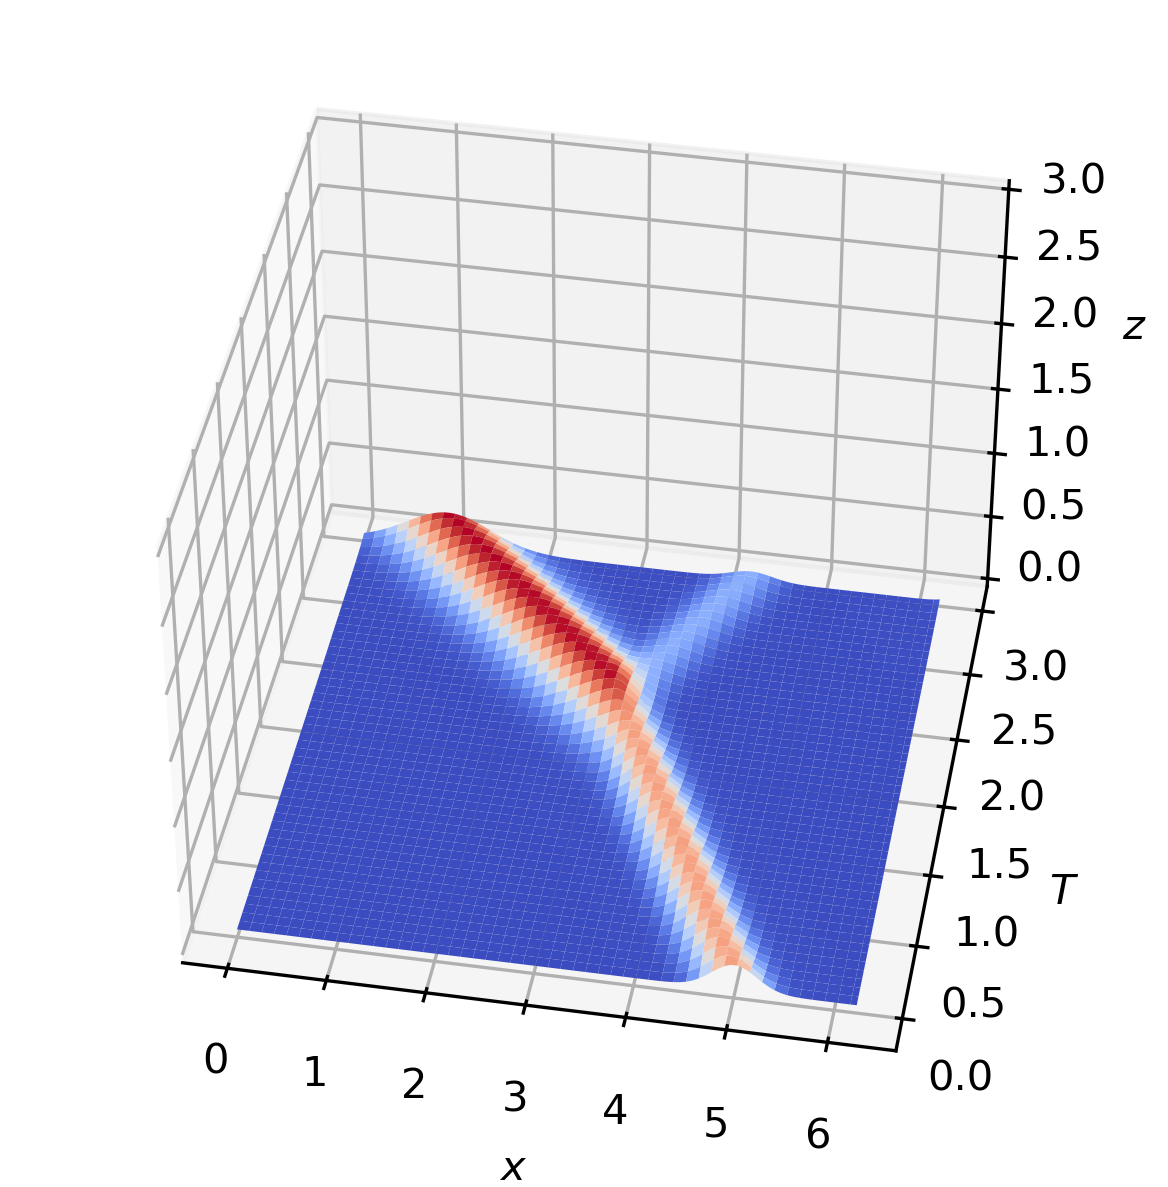

In [45]:
# Define t_steps and x_steps
t_steps = 150
x_steps = 100

# Define the k values
k = np.concatenate((np.arange(0, x_steps // 2),
                    np.array([0]),
                    np.arange(-x_steps // 2 + 1, 0)))

# Define x values and t values
x_domain = (2 * np.pi / x_steps) * np.arange(x_steps)
t_domain = (3 / t_steps) * np.arange(t_steps)

# Define c function
def c(x):
    return np.where((x >= 0) & (x < np.pi), 4, 1)

# Element 1: The ODE function
def ode_3(t,u):
    
    # Get the first system of ODEs defined
    row_1 = u[x_steps:]
    
    # Get the second system of ODEs defined
    f_hat = fft(u[:x_steps])
    fp_hat = (1j * k * f_hat)
    fp = np.real(ifft(fp_hat))
    fp_hat = fft(fp)
    fpp_hat = (1j * k * fp_hat)
    fpp = np.real(ifft(fpp_hat))
    row_2 = c(x_domain) * fpp
    
    # Return the concatenated system
    final = np.concatenate((row_1, row_2)) 
    return final

# Element 2: The Initial Condition Function (Original)
def f(x):
    return 0.2 * np.exp(-10 * (x - 5) ** 2)

# Element 3: The Initial Condition Function (Derivative)
def fp(x):
    return -4 * (x - 5) * np.exp(-10 * (x - 5) ** 2)

# Concatenate the initial conditions
initial_condition = np.concatenate((f(x_domain), fp(x_domain)))

# Element 4: Set time domain
t_span = (0, 3)

# Solve the ivp
sol = solve_ivp(ode_3, t_span, initial_condition, t_eval=t_domain)

# Plotting the results
X, Y = np.meshgrid(x_domain, t_domain)
fig = plt.figure(dpi = 300)
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(X, Y, np.transpose(sol.y[:x_steps]), cmap='coolwarm')
ax.set_zlim(0, 3)
ax.view_init(elev=40, azim=280)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$T$')
ax.set_zlabel(r'$z$')
plt.show()
